In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [15]:
data=pd.read_csv("C:\\Users\\Prachi Kumbhkar\\Downloads\\dts\\water potability dataset.csv")
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [16]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


###  Data Cleaning

In [17]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [19]:

null_var = data.isnull().sum()/data.shape[0]*100
null_var

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

<AxesSubplot:>

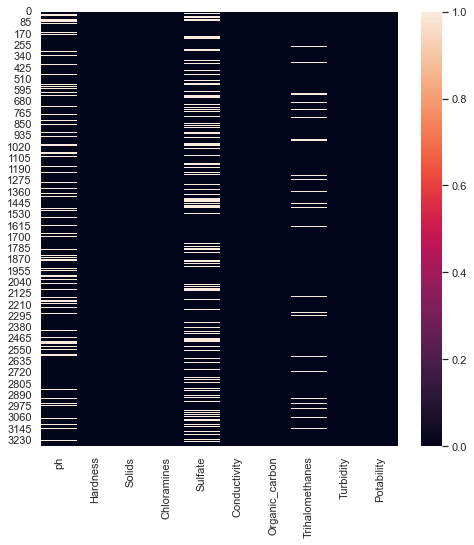

In [20]:
plt.figure(figsize = (8,8))
sns.heatmap(data.isnull())

###  if we want to see which column has missing value

In [21]:
missing_val_col     = data.columns[data.isna().any()]
missing_val_col

Index(['ph', 'Sulfate', 'Trihalomethanes'], dtype='object')

### to see the distribution of missing values columns

C:\Users\Prachi Kumbhkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Prachi Kumbhkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Prachi Kumbhkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

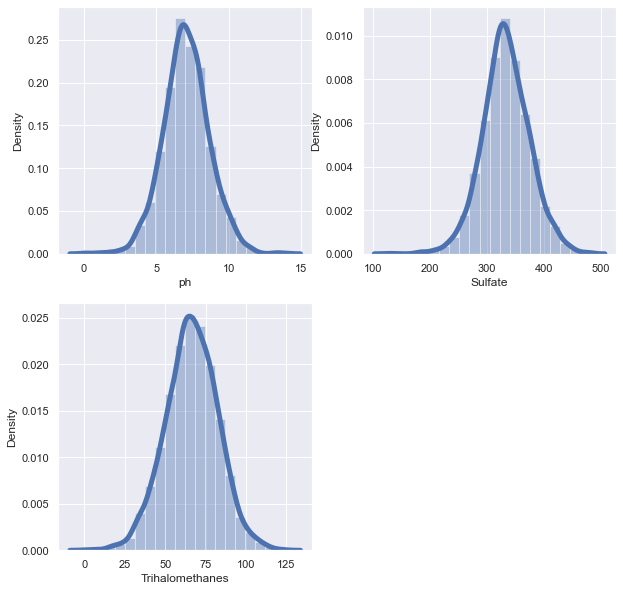

In [22]:
plt.figure(figsize = (10,10))
sns.set()
for i , var in enumerate(missing_val_col):
    plt.subplot(2,2,i+1)
    sns.distplot(data[var],bins = 20 , kde_kws = {'linewidth':5 })

In [23]:
data.fillna(data.mean(),inplace = True)

In [24]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [25]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

##  Exploratory Data Analysis

####  checking balance of data 

In [31]:
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

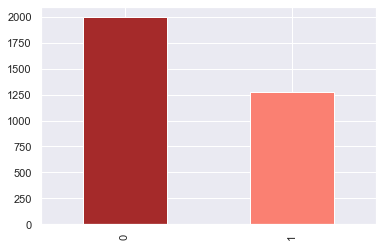

In [32]:
data.Potability.value_counts().plot(kind="bar", color=["brown", "salmon"])
plt.show()

In [33]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


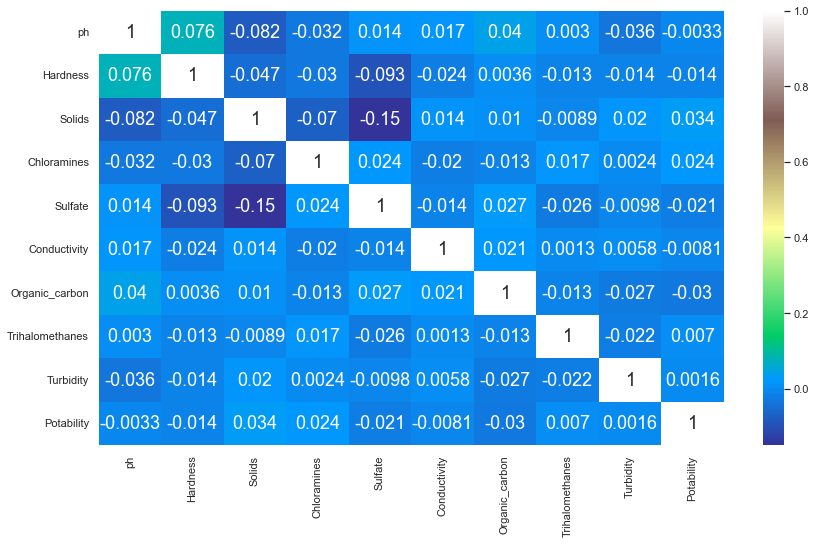

In [34]:

plt.figure(figsize = (14,8))
sns.heatmap(data.corr()  ,annot = True ,annot_kws={"size":18} , cmap = 'terrain')    #   annotations
plt.show()

<AxesSubplot:>

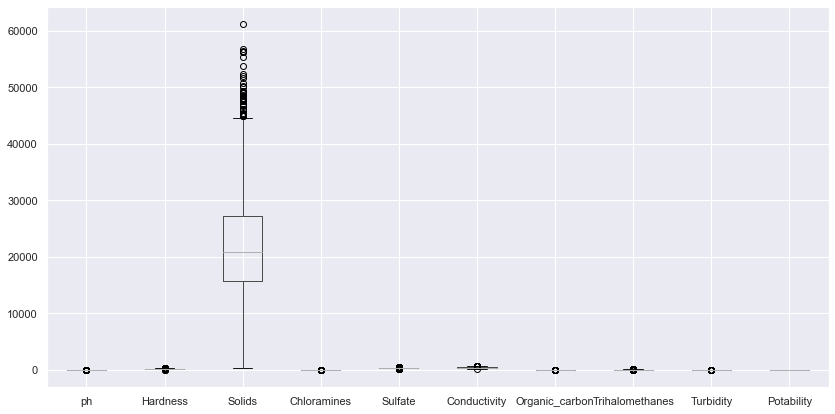

In [36]:
data.boxplot(figsize=(14,7))

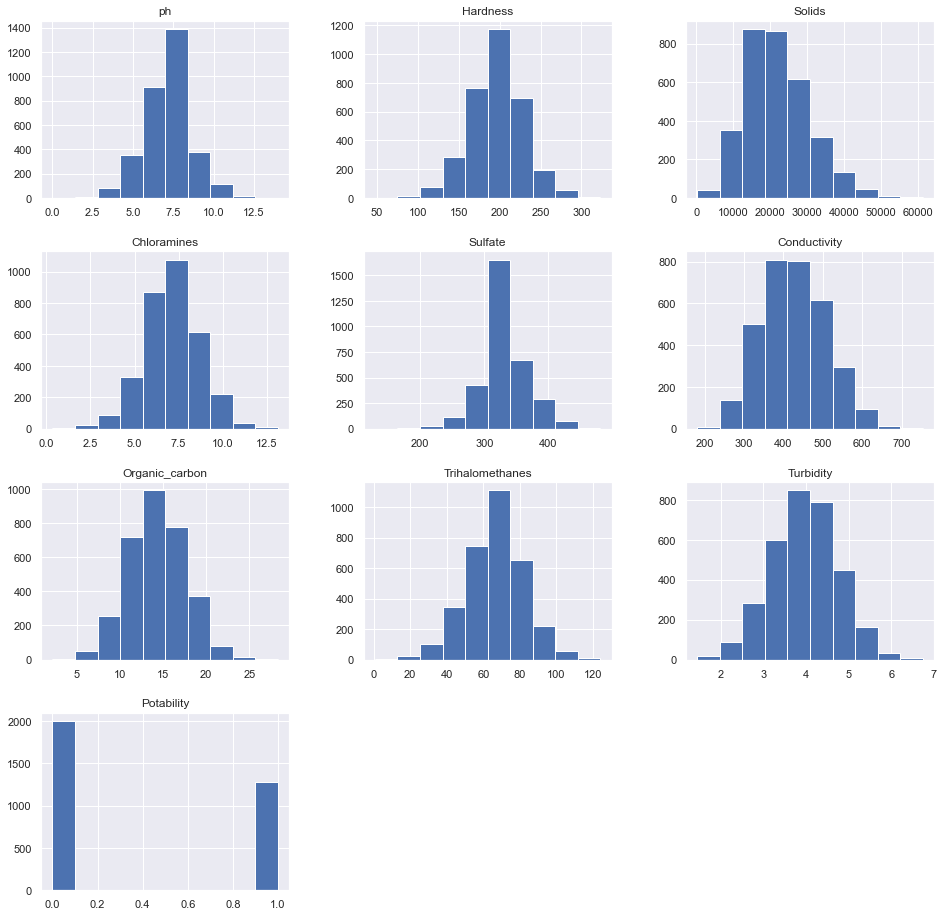

In [37]:
data.hist(figsize=(16,16))
plt.show()

C:\Users\Prachi Kumbhkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph', ylabel='Density'>

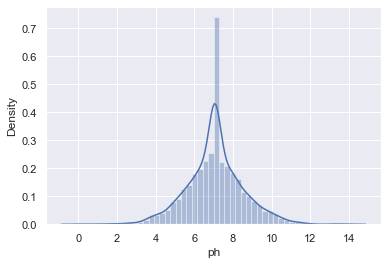

In [38]:
sns.distplot(data['ph'])

In [ ]:
sns.scatterplot(df['Hardness'],df['Solids'])

C:\Users\Prachi Kumbhkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ph', ylabel='Potability'>

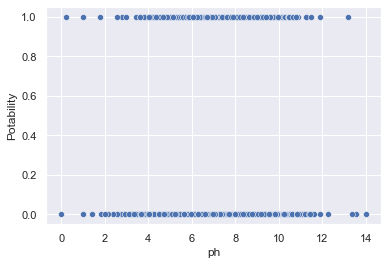

In [46]:

sns.scatterplot(data['ph'],data['Potability'])

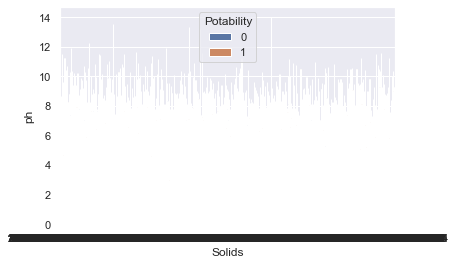

In [47]:
sns.barplot(x = data['Solids'], y=data['ph'],hue = data['Potability'])
plt.show()

## splitting data into training and testing / partitioning 

In [48]:
X = data.drop('Potability',axis = 1)   ##  x would have input or feature data

In [49]:
Y= data['Potability']   ###   target variable(label)

In [52]:
X.shape

(3276, 9)

In [53]:
Y.shape

(3276,)

In [44]:
#from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101)

In [50]:
X_train.shape

(2620, 9)

In [51]:
Y_train.shape

(2620,)

In [55]:
X_test.shape

(656, 9)

In [54]:
Y_test.shape

(656,)

In [197]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [199]:
X_train = sc.fit_transform(X_train)   ## fit calculate mean and std of data  and  transform will apply for all column in X_train variables
#X_test = sc.transform(X_test)
X_train

array([[-0.23238272,  0.32782423,  0.18861394, ..., -2.51350006,
        -2.260763  , -1.5507841 ],
       [ 0.31036476,  0.16592625,  0.54151006, ...,  0.21583817,
         1.06889136,  0.30230183],
       [ 0.71521877,  1.05895434, -0.23490462, ...,  0.22569074,
        -0.20866015,  0.90760031],
       ...,
       [-1.50107336, -0.69566929, -0.82836487, ..., -1.97417747,
        -1.76143562, -1.06632911],
       [-0.59915976,  0.21936764, -0.73518501, ...,  0.09782702,
         0.2664088 ,  0.22404939],
       [ 0.41056205,  1.03352152, -1.68511649, ..., -0.01249549,
         0.46995326,  0.26157819]])

## Model building

In [200]:
#from sklearn.linear_model import LogisticRegression

In [201]:
# creating the model object

logmodel = LogisticRegression()


In [202]:
#  training  the model

logmodel.fit(X_train,Y_train)

LogisticRegression()

In [203]:
predictvalue = logmodel.predict(X_test)

In [204]:
#from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

accuracy_model=accuracy_score(predictvalue,Y_test)*100
accuracy_model

61.28048780487805

###  Decision Tree Classification 

In [206]:
from sklearn.tree import DecisionTreeClassifier

In [207]:
# creating the model object
model = DecisionTreeClassifier()

In [208]:
#  training  the model

model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [209]:
X_test

array([[-0.93063679, -1.16836457,  0.38611387, ..., -0.19697574,
         0.58911123,  0.97770623],
       [ 0.93325107,  0.97809453,  0.79988798, ...,  0.0847884 ,
        -0.38127497,  0.54804513],
       [-0.24184637,  0.72057253,  0.3093802 , ..., -2.28638038,
        -3.69829973,  0.11154579],
       ...,
       [-0.00534966, -0.86048837,  0.63060741, ...,  0.57925872,
         0.5750108 , -1.20119343],
       [ 0.35980326,  0.78637406,  0.35174321, ...,  1.21462507,
         0.1110745 , -1.42723878],
       [ 1.23418761, -1.86533209, -1.96843854, ...,  1.82897961,
        -2.92896239, -0.1926776 ]])

In [210]:
Y_test

2541    0
2605    0
330     1
515     0
400     1
       ..
482     0
2970    0
50      0
839     0
374     1
Name: Potability, Length: 656, dtype: int64

In [211]:
Y_prediction_value = model.predict(X_test)

In [212]:
#from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [213]:
accuracy_model=accuracy_score(Y_test,Y_prediction_value)*100
accuracy_model

58.079268292682926

In [214]:
cm2 = confusion_matrix(Y_prediction_value,Y_test)
cm2

array([[268, 141],
       [134, 113]], dtype=int64)

<AxesSubplot:>

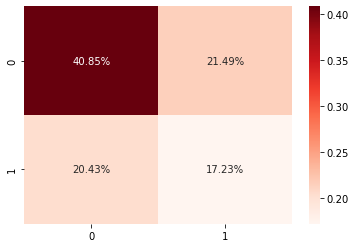

In [215]:
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

#### Prediction on only one set of data

In [216]:

X_DT=model.predict([[5.735724, 158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])
X_DT

array([0], dtype=int64)

###  RandomForestClassifier

In [217]:
from sklearn.ensemble import RandomForestClassifier

In [218]:
# create model object

modelrfc = RandomForestClassifier()

In [219]:
# training the model

modelrfc.fit(X_train,Y_train)

RandomForestClassifier()

In [220]:
##  making prediction

modelpredict = modelrfc.predict(X_test)

In [221]:
accuracy_model=accuracy_score(Y_test,modelpredict)*100
accuracy_model

67.3780487804878

In [222]:
cm3 = confusion_matrix(Y_test,modelpredict)
cm3

array([[354,  48],
       [166,  88]], dtype=int64)

<AxesSubplot:>

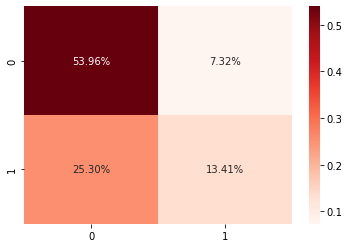

In [223]:
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')